<a href="https://colab.research.google.com/github/EunSeong22/text_analysis/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

s = os.path.join('http://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris', 'iris.data')
print('URL:', s)

URL: http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [2]:
df = pd.read_csv(s,
                 header = None,
                 encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [4]:
X= df.iloc[0:100, [0, 2]].values

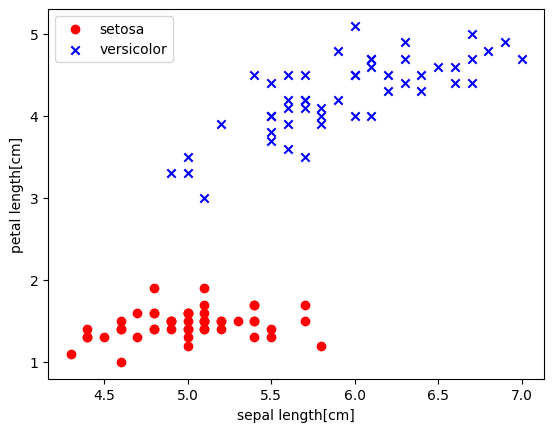

In [5]:
plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker= 'o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker= 'x', label='versicolor')

plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

In [6]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state= 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state 
        
    def fit(self, X,y):
        # 처음에는 가중치를 랜덤한 값으로 초기화
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
        
        self.errors_ = [] # 학습하면서 에러를 리스트에 넣음
        
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update #feature 벡터에서 첫번째 feature는 1로 둠 (퍼셉트론 이론 글 참고)
                self.w_[1:] += update * xi 
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        #결정 함수 들어가기전 최종 입력 계산 
                
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

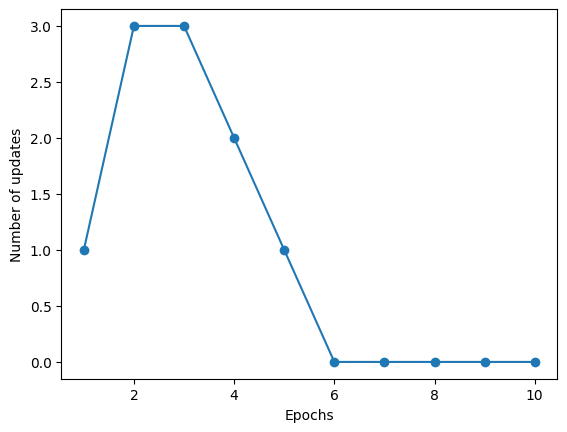

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

<ipython-input-8-6ca4b29c138e>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


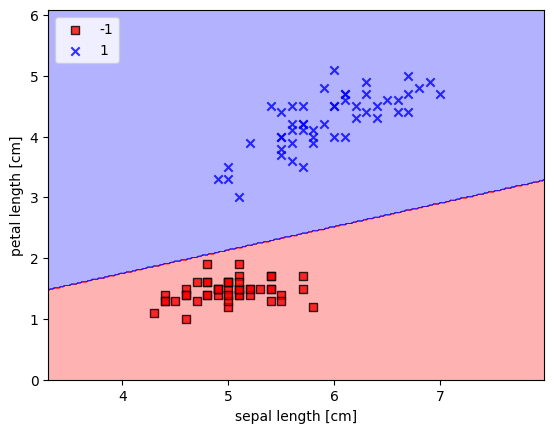

In [9]:
       
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()